In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import dates
from datetime import datetime


## Import Data
 

In [2]:
data = pd.read_csv(r"C:\Users\Administrator\Desktop\cv\Retail-Analysis\walmart-sales-dataset-of-45stores.csv" )
df = pd.DataFrame(data)
df


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


## data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


###  I get the count of null values in each column. The default axis for .sum() is 0, which means it sums down each column.


In [4]:
df.isnull().sum() 


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
df = df.drop_duplicates()
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


#### The dataset contains incorrect data types, so we need to perform type casting to ensure consistency.


In [6]:
df['Date'] = pd.to_datetime(df['Date'])


print(df.to_string())


C:\Users\Administrator\AppData\Local\Temp\ipykernel_27856\208735452.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
0         1 2010-05-02    1643690.90             0        42.31       2.572  211.096358         8.106
1         1 2010-12-02    1641957.44             1        38.51       2.548  211.242170         8.106
2         1 2010-02-19    1611968.17             0        39.93       2.514  211.289143         8.106
3         1 2010-02-26    1409727.59             0        46.63       2.561  211.319643         8.106
4         1 2010-05-03    1554806.68             0        46.50       2.625  211.350143         8.106
5         1 2010-12-03    1439541.59             0        57.79       2.667  211.380643         8.106
6         1 2010-03-19    1472515.79             0        54.58       2.720  211.215635         8.106
7         1 2010-03-26    1404429.92             0        51.45       2.732  211.018042         8.106
8         1 2010-02-04    1594968.28             0        62.27       2.719  210.8

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 452.5 KB


## Find the store with the maximum sales


In [8]:
maxSales = data.groupby('Store')['Weekly_Sales'].sum()

In [9]:
sorted_maxSales = maxSales.sort_values(ascending=False)
sorted_maxSales


Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

In [10]:
print("Store that has Highest sales is : {} , and The Value of Sales is {}:".format(maxSales.idxmax(),maxSales.max()))

Store that has Highest sales is : 20 , and The Value of Sales is 301397792.46:


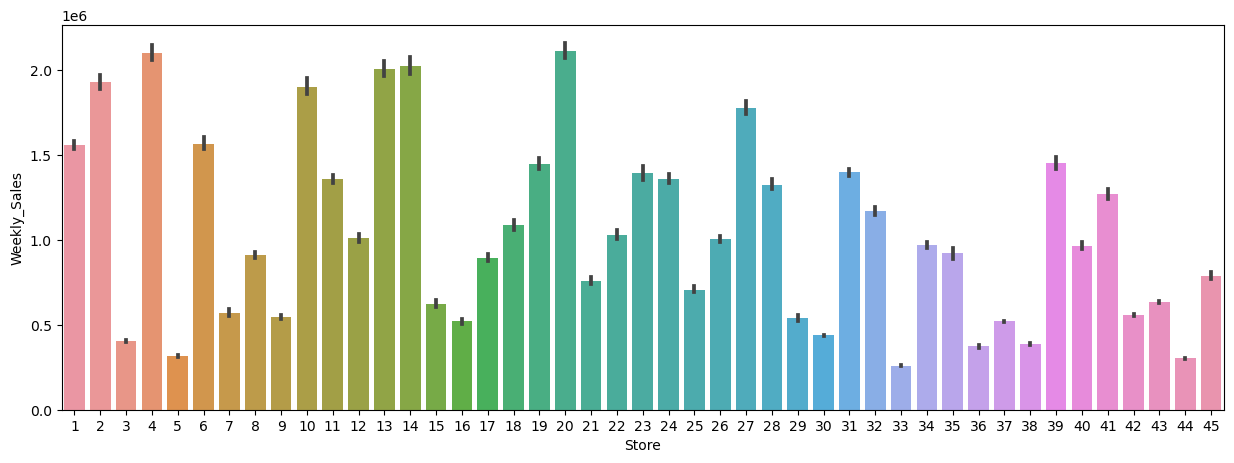

In [11]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x=data.Store,y=data.Weekly_Sales)
#plt.bar(data=data,x="Store",height='Weekly_Sales')
plt.show()

## Which store has maximum standard deviation i.e., the sales vary a lot


In [12]:
max_std = data.groupby('Store')['Weekly_Sales'].std()
max_std.idxmax()


14

#### Some holidays have a negative impact on sales. Find out holidays that have higher sales than the mean sales in the non-holiday season for all stores together.

In [13]:
data_normal_day=data[data.Holiday_Flag==0]
data_normal_day

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [14]:
data_holiday_day=data[data.Holiday_Flag==1]
data_holiday_day


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
6375,45,09-09-2011,746129.56,1,71.48,3.738,186.673738,8.625
6386,45,25-11-2011,1170672.94,1,48.71,3.492,188.350400,8.523
6391,45,30-12-2011,869403.63,1,37.79,3.389,189.062016,8.523
6397,45,10-02-2012,803657.12,1,37.00,3.640,189.707605,8.424


In [15]:
data_holiday_positive_impact = data_holiday_day[(data_holiday_day.Weekly_Sales) > (data_normal_day.Weekly_Sales.mean())]
data_holiday_positive_impact

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
5819,41,30-12-2011,1264014.16,1,34.12,3.119,196.358610,6.759
5825,41,10-02-2012,1238844.56,1,22.00,3.103,196.919506,6.589
5855,41,07-09-2012,1392143.82,1,67.41,3.596,198.095048,6.432
6334,45,26-11-2010,1182500.16,1,46.15,3.039,182.783277,8.724


In [16]:

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df2010=df.loc[(df['Date'] >= '2010-01-01')& (df['Date'] < '2010-12-31')]
df2011=df.loc[(df['Date'] >= '2011-01-01')& (df['Date'] < '2011-12-31')]
df2012=df.loc[(df['Date'] >= '2012-01-01')& (df['Date'] < '2012-12-31')]


In [17]:

df2010ByMonth=df2010.groupby(df2010.Date.dt.month)['Weekly_Sales'].sum()
df2010ByMonth=pd.DataFrame(df2010ByMonth)
df2010ByMonth.columns=["Monthly_Sales_for2010"]

df2011ByMonth=df2011.groupby(df2011.Date.dt.month)['Weekly_Sales'].sum()
df2011ByMonth=pd.DataFrame(df2011ByMonth)
df2011ByMonth.columns=["Monthly_Sales_for2011"]

df2012ByMonth=df2012.groupby(df2012.Date.dt.month)['Weekly_Sales'].sum()
df2012ByMonth=pd.DataFrame(df2012ByMonth)
df2012ByMonth.columns=["Monthly_Sales_for2012"]

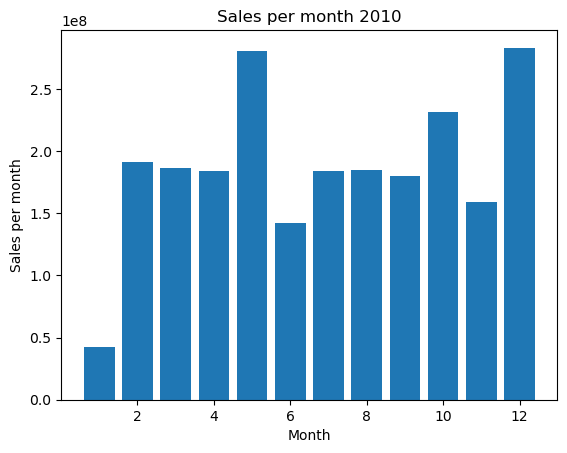

In [18]:
plt.bar(df2010ByMonth.index , height=df2010ByMonth["Monthly_Sales_for2010"] )

plt.xlabel("Month")
plt.ylabel("Sales per month")
plt.title("Sales per month 2010")
plt.show()


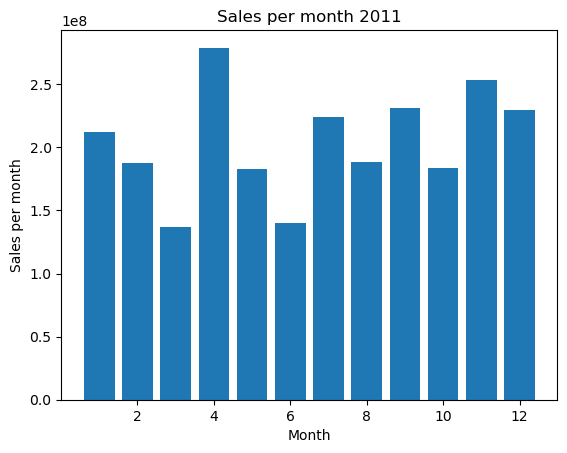

In [19]:
plt.bar(df2011ByMonth.index , height=df2011ByMonth["Monthly_Sales_for2011"] )
plt.xlabel("Month")
plt.ylabel("Sales per month")
plt.title("Sales per month 2011")
plt.show()


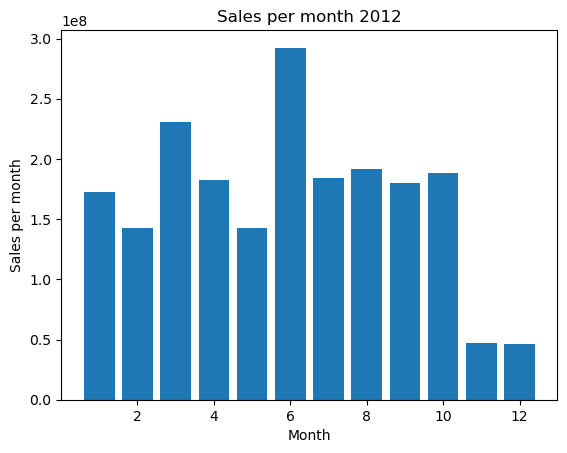

In [20]:
plt.bar(df2012ByMonth.index , height=df2012ByMonth["Monthly_Sales_for2012"] )
plt.xlabel("Month")
plt.ylabel("Sales per month")
plt.title("Sales per month 2012")
plt.show()


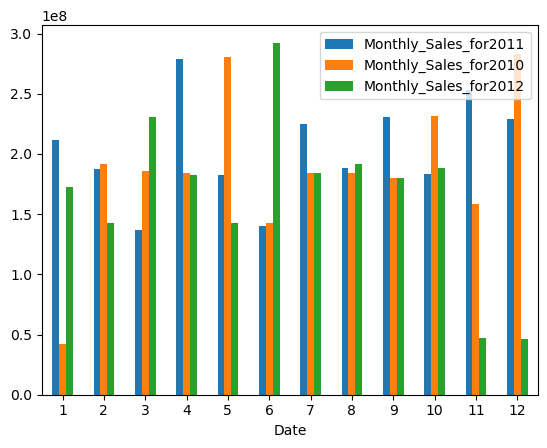

In [21]:
df2 = df2011ByMonth.join(df2010ByMonth)
df3 = df2.join(df2012ByMonth)
ax = df3.plot.bar(rot=0)
plt.show()

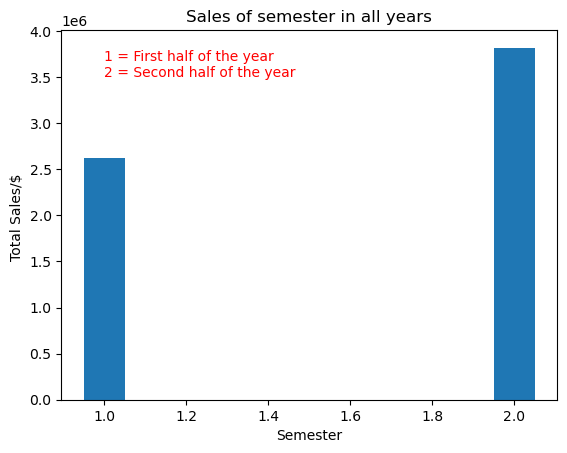

In [22]:
df["Date"]=pd.to_datetime(df["Date"])
df["quarter"]=df["Date"].dt.quarter
df["semster"]=np.where(df["quarter"].isin([1,2]),1,2)

plt.title("Sales of semester in all years")
plt.xlabel("Semester")
plt.ylabel("Total Sales/$ ")
plt.text(1,3500000,"1 = First half of the year \n2 = Second half of the year",color="r")
plt.bar(df["semster"],height=df["Weekly_Sales"],width=0.1 , align='center')
plt.show()

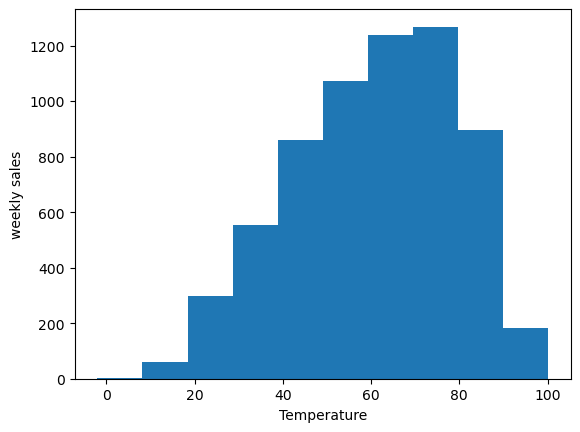

In [23]:
plt.hist(df["Temperature"])
plt.ylabel("weekly sales")
plt.xlabel("Temperature")
plt.show()

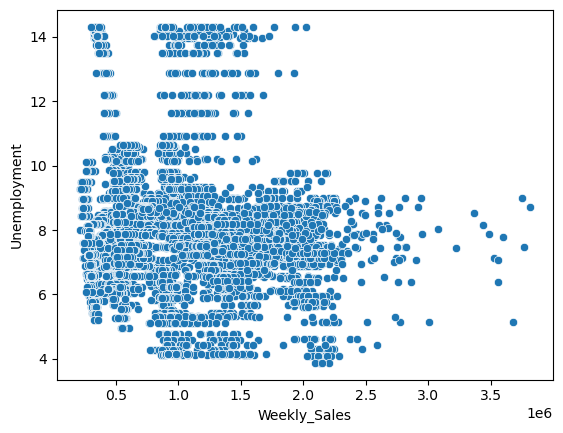

In [24]:
sns.scatterplot(x = df["Weekly_Sales"] ,y  = df["Unemployment"])
plt.show()


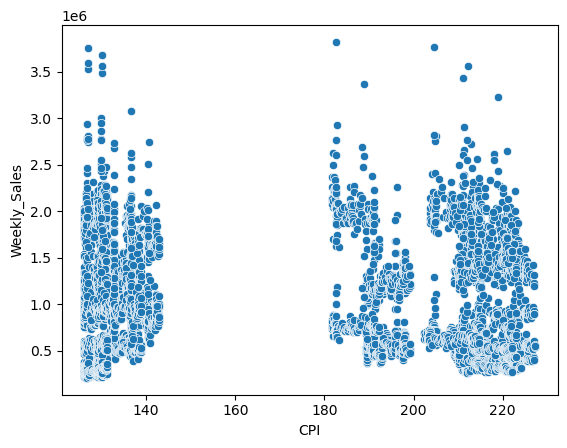

In [25]:
sns.scatterplot(x = df["CPI"] ,y  = df["Weekly_Sales"])
plt.show()